In [1]:
import os
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from biosppy.signals import ppg
import heartpy as hp

Load Data

In [2]:
def load_data(dir):
    data = []
    for file in os.listdir(dir):
        if file.endswith(".csv"):
            print(os.path.join(dir, file))
            df = pd.read_csv(os.path.join(dir, file),on_bad_lines='skip')
            if not df.empty:
                data.append(df)
    return data


try:
    Group1 = load_data("/mnt/ArtHeart/Data/Group 1")
    Group2 = load_data("/mnt/ArtHeart/Data/Group 2")
    Group3 = load_data("/mnt/ArtHeart/Data/Group 3")
except:
    try:
        Group1 = load_data("Data/Group 1")
        Group2 = load_data("Data/Group 2")
        Group3 = load_data("Data/Group 3")
    except:
        Group1 = load_data("W:\PhD\ArtHeart\Data\Group 1")
        Group2 = load_data("W:\PhD\ArtHeart\Data\Group 2")
        Group3 = load_data("W:\PhD\ArtHeart\Data\Group 3")




W:\PhD\ArtHeart\Data\Group 1\1.csv
W:\PhD\ArtHeart\Data\Group 1\10.csv
W:\PhD\ArtHeart\Data\Group 1\11.csv
W:\PhD\ArtHeart\Data\Group 1\12.csv
W:\PhD\ArtHeart\Data\Group 1\13.csv
W:\PhD\ArtHeart\Data\Group 1\14.csv
W:\PhD\ArtHeart\Data\Group 1\15.csv
W:\PhD\ArtHeart\Data\Group 1\16.csv
W:\PhD\ArtHeart\Data\Group 1\17.csv
W:\PhD\ArtHeart\Data\Group 1\18.csv
W:\PhD\ArtHeart\Data\Group 1\19.csv
W:\PhD\ArtHeart\Data\Group 1\2.csv
W:\PhD\ArtHeart\Data\Group 1\20.csv
W:\PhD\ArtHeart\Data\Group 1\21.csv
W:\PhD\ArtHeart\Data\Group 1\22.csv
W:\PhD\ArtHeart\Data\Group 1\23.csv
W:\PhD\ArtHeart\Data\Group 1\24.csv
W:\PhD\ArtHeart\Data\Group 1\25.csv
W:\PhD\ArtHeart\Data\Group 1\26.csv
W:\PhD\ArtHeart\Data\Group 1\27.csv
W:\PhD\ArtHeart\Data\Group 1\28.csv
W:\PhD\ArtHeart\Data\Group 1\29.csv
W:\PhD\ArtHeart\Data\Group 1\3.csv
W:\PhD\ArtHeart\Data\Group 1\30.csv
W:\PhD\ArtHeart\Data\Group 1\31.csv
W:\PhD\ArtHeart\Data\Group 1\32.csv
W:\PhD\ArtHeart\Data\Group 1\33.csv
W:\PhD\ArtHeart\Data\Group 1\34

Starting with withing group comparisons

In [3]:
def interpolate_nan(data):
    for i in range(len(data)):
        df = data[i]
        df['UTC'] = df['UTC'].interpolate()
        data[i] = df
    return data


def cut_to_common_length(data):

    # Interpolate NaN values
    data = interpolate_nan(data)

    # Find the shortest dataframe
    shortest_df = min(data, key=lambda x: len(x))

    # Find the first value of UTC in the shortest dataframe that isn't NaN
    first_utc = shortest_df['UTC'].first_valid_index()
    first_utc_value = shortest_df['UTC'][first_utc]

    # Find the length of the dataframe from that point to the end
    length = len(shortest_df.loc[first_utc:])

    # Cut all dataframes to the same length and reset the index
    for i in range(len(data)):
        df = data[i]

        if first_utc_value in df['UTC'].values:
            match_utc_index = df[df['UTC'] == first_utc_value].index[0]
        else:
            match_utc_index = df.iloc[(df['UTC']-first_utc_value).abs().argsort()[:1]].index[0]

        df = df.loc[match_utc_index:].iloc[:length].reset_index(drop=True)
        data[i] = df
    return data




Group1 = cut_to_common_length(Group1)
Group2 = cut_to_common_length(Group2)
Group3 = cut_to_common_length(Group3)
 

    


In [4]:
print(len(Group1))
print(len(Group2))
print(len(Group3))

print(Group1[0].shape)
print(Group1[1].shape)

37
39
32
(143904, 6)
(143904, 6)


In [5]:
from datetime import datetime
import math

def utc_to_datetime_string(utc_value):
    dt = datetime.fromtimestamp(utc_value)
    return dt.strftime('%H %M %S.%f')

def convert_to_datetime(df):
    for i in range(len(df['UTC'])):
        val = df['UTC'][i]
        if not math.isnan(val):
            df['UTC'][i] = utc_to_datetime_string(df['UTC'][i])
    return df




Group1 = [convert_to_datetime(df) for df in Group1]
Group2 = [convert_to_datetime(df) for df in Group2]
Group3 = [convert_to_datetime(df) for df in Group3]



C:\Users\Tom\AppData\Local\Temp\ipykernel_28196\3409219099.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UTC'][i] = utc_to_datetime_string(df['UTC'][i])
C:\Users\Tom\AppData\Local\Temp\ipykernel_28196\3409219099.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UTC'][i] = utc_to_datetime_string(df['UTC'][i])
C:\Users\Tom\AppData\Local\Temp\ipykernel_28196\3409219099.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

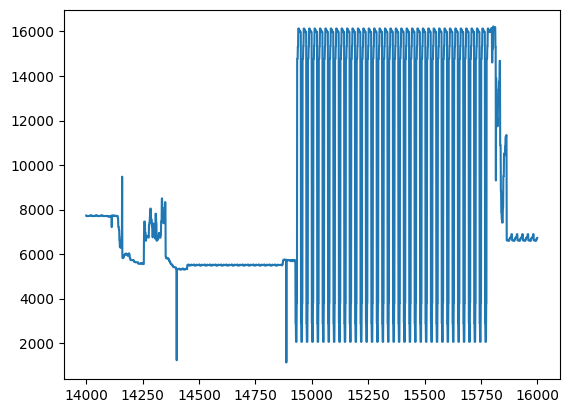

In [6]:

df = Group1[0]


plt.plot(df['DATA'][14000:16000])
plt.show()


sampling rate is: 21.640 Hz


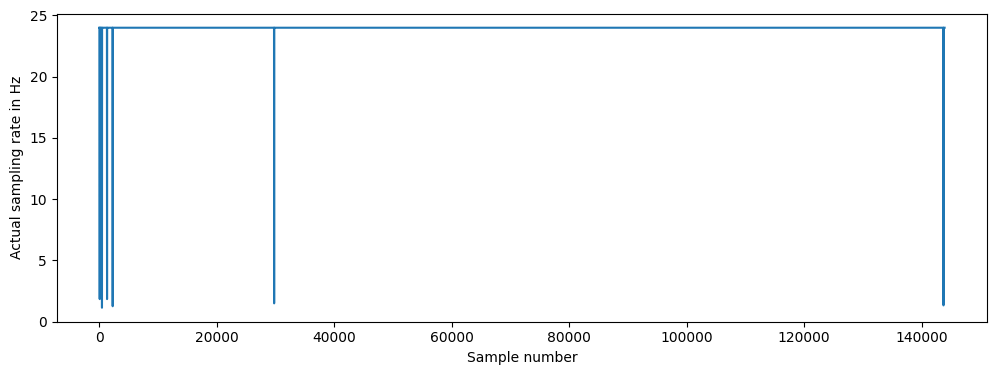

mean sampling rate: 23.974
median sampling rate: 24.000
standard deviation: 0.763


In [7]:
import heartpy as hp
timer = Group1[0]['UTC']
sample_rate = hp.get_samplerate_datetime(timer, timeformat='%H %M %S.%f')
print('sampling rate is: %.3f Hz' %sample_rate)


newtimer = [datetime.strptime(x, '%H %M %S.%f') for x in timer]


elapsed = []
for i in range(len(newtimer) - 1):
    elapsed.append(1 / ((newtimer[i+1] - newtimer[i]).microseconds / 1000000))


plt.figure(figsize=(12,4))
plt.plot(elapsed)
plt.xlabel('Sample number')
plt.ylabel('Actual sampling rate in Hz')
plt.show()

print('mean sampling rate: %.3f' %np.mean(elapsed))
print('median sampling rate: %.3f'%np.median(elapsed))
print('standard deviation: %.3f'%np.std(elapsed))

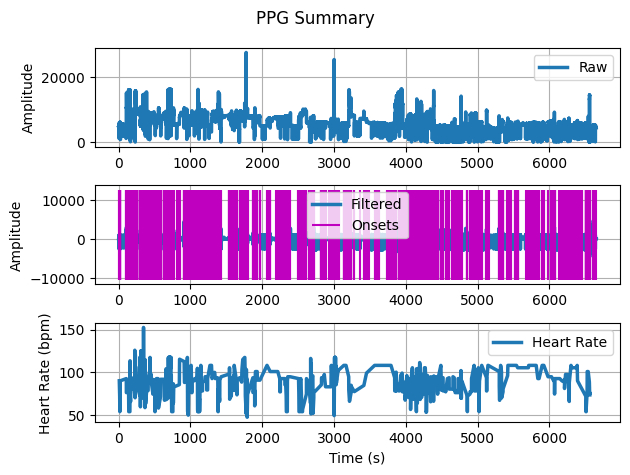

ReturnTuple(ts=array([0.00000000e+00, 4.62107525e-02, 9.24215049e-02, ...,
       6.64977349e+03, 6.64981970e+03, 6.64986591e+03]), filtered=array([ 0.17732201,  3.62328213, 13.40236957, ...,  4.29272839,
        4.59464812,  0.26034121]), onsets=array([   181,    193,    286, ..., 143566, 143713, 143806]), heart_rate_ts=array([   8.91867522,   14.32533326,   15.43439132,   16.54344938,
         17.65250744,   22.64326871,  106.51578442,  107.48621022,
        137.19972405,  137.70804233,  138.81710039,  139.92615845,
        141.03521651,  142.14427457,  143.25333262,  144.36239068,
        145.47144874,  146.5805068 ,  147.68956486,  148.79862292,
        149.90768098,  151.01673904,  152.1257971 ,  153.23485516,
        154.34391321,  155.45297127,  156.56202933,  157.67108739,
        158.31803793,  158.8263562 ,  159.28846373,  160.02783577,
        160.85962931,  161.6452121 ,  162.70805941,  166.35870885,
        167.2829239 ,  170.14799056,  170.84115184,  171.76536689,
       

In [8]:
ppg.ppg(signal=Group1[0]['DATA'], sampling_rate=sample_rate, show=True)

In [9]:
def ppg_calc(data):
    data_return = []
    for i in range(len(data)):
        df = data[i]
        data_return.append(ppg.ppg(signal=df['DATA'], sampling_rate=sample_rate, show=False))
    return data_return

Group1 = ppg_calc(Group1)
Group2 = ppg_calc(Group2)
Group3 = ppg_calc(Group3)

In [10]:
def calc_med_hr(data):
    med_hr = []
    for i in range(len(data)):
        arr = data[i]
        med_hr.append(np.median(arr[4]))

    med_hr = np.median(med_hr)

    return med_hr

Group1_med_hr = calc_med_hr(Group1)
Group2_med_hr = calc_med_hr(Group2)
Group3_med_hr = calc_med_hr(Group3)

print("Group 1 Median HR: " + str(Group1_med_hr))
print("Group 2 Median HR: " + str(Group2_med_hr))
print("Group 3 Median HR: " + str(Group3_med_hr))


Group 1 Median HR: 81.6418838831272
Group 2 Median HR: 76.5526836967544
Group 3 Median HR: 78.31559274394458


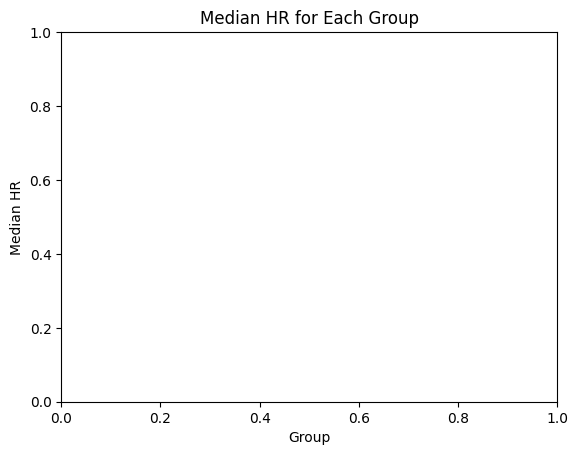

In [11]:

def cut_to_common_length(data, time):
    # Find the shortest dataframe
    shortest_time = min(time, key=len)
    shortest_index = np.argmin([len(t) for t in time])

    # Find the first value of time in the shortest array that isn't NaN
    first_time = shortest_time[~np.isnan(shortest_time)][0]

    # Find the length of the array from that point to the end
    length = len(shortest_time[shortest_time >= first_time])

    # Cut all arrays to the same length
    for i in range(len(data)):
        arr = data[i]
        t = time[i]

        # Find the index of the first matching time value
        if first_time in t:
            match_index = np.where(t == first_time)[0][0]
        else:
            match_index = np.argmin(np.abs(t - first_time))

        # Cut the array to the same length as the shortest array
        arr = arr[match_index:match_index+length]
        data[i] = arr

    return data


def group_median_hr(data):
    dat = []
    time = []
    
    for i in range(len(data)):
        df = data[i]
        dat.append(df[4])
        time.append(df[3])

Group1_med_hr = group_median_hr(Group1)
Group2_med_hr = group_median_hr(Group2)
Group3_med_hr = group_median_hr(Group3)

import matplotlib.pyplot as plt

# Plot median HR for each group
plt.title('Median HR for Each Group')
plt.xlabel('Group')
plt.ylabel('Median HR')
plt.show()
